In [1]:
import numpy as np

In [2]:
import pandas as pd
X = pd.read_csv('./Training Data/Logistic_X_Train.csv')
Y = pd.read_csv('./Training Data/Logistic_Y_Train.csv')
X = X.to_numpy()
Y = Y.to_numpy()
print(X.shape)
print(Y.shape)

(2250, 2)
(2250, 1)


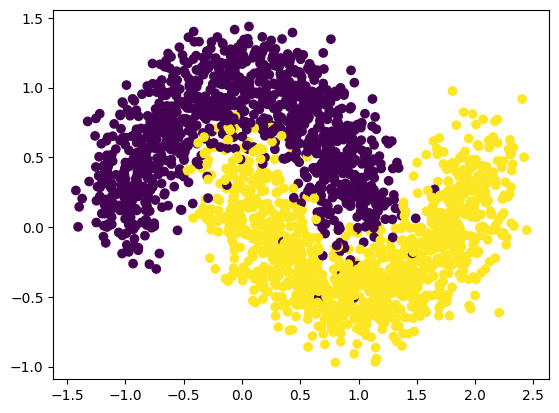

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:

def softmax(z):
    print(z)
    e_power_z = np.exp(z)
    ans = e_power_z/np.sum(e_power_z, axis=1, keepdims=True) # dont reduce the dimensions - keep it
    return ans


In [5]:
def sigmoid(x): 
    return 1.0/(1.0 + np.exp(-x))

In [6]:
softmax_test = np.array([[10, 10],
                         [20, 20]])
softmax(softmax_test)

[[10 10]
 [20 20]]


array([[0.5, 0.5],
       [0.5, 0.5]])

In [7]:
# def relu(x):
#     if x > :
    #    // for vanishing gradient

In [8]:
class NeuralNetwork():
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))

        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))

        model['W3'] = np.random.randn(layers[1], layers[2])
        model['b3'] = np.zeros((1, layers[2]))

        model['W4'] = np.random.randn(layers[2], output_size)
        model['b4'] = np.zeros((1, output_size))

        self.model = model
    
    def forward(self, X):
        z1 = np.dot(X, self.model['W1']) + self.model['b1']
        a1 = np.tanh(z1) # - shape - m x num_neurons_layers[0]

        z2 = np.dot(a1, self.model['W2']) + self.model['b2']
        a2 = np.tanh(z2) # - shape - m x num_neurons_layers[1]

        z3 = np.dot(a2, self.model['W3']) + self.model['b3']
        a3 = np.tanh(z3) # - shape - m x num_neurons_layers[2]

        z4 = np.dot(a3, self.model['W4']) + self.model['b4']
        # Yhat = softmax(z4)
        Yhat = sigmoid(z4)
        self.activation_outputs = (a1, a2, a3, Yhat)
        # print(Yhat)
        return Yhat

    def backward(self, X, onehotVec_Y, learning_rate = 0.0001):
        
        # m examples, c classes
        a1, a2, a3, Yhat = self.activation_outputs

        delta4 = Yhat - onehotVec_Y # derivative of cross entropy Loss w.r.t. Yhat = activation fn, delta4 Shape - m x c
        # delta4 = m x c
        # a3 = m x num_neurons_layers[2] 
        dw4 = np.dot(a3.T, delta4)# derivative of activation fn w.r.t w4, Shape - num_neurons_layers[2] x c
        db4 = np.sum(delta4, axis=0)

        # delta4 = m x c
        # dw4 = num_neurons_layers[2] x c
        delta3 = np.dot(delta4, dw4.T) * (1 - np.square(a3)) # derivative of cross entropy Loss w.r.t. activation fn a3, delta3 Shape - m x num_neurons_layers[2]
        # delta3 = m x num_neurons_layers[2]
        # a2 = m x num_neurons_layers[1]
        dw3 = np.dot(a2.T, delta3)# derivative of z w.r.t w3, Shape - num_neurons_layers[1] x num_neurons_layers[2]
        db3 = np.sum(delta3, axis=0)

        # delta3 = m x num_neurons_layers[2]
        # dw3 = num_neurons_layers[1] x num_neurons_layers[2]
        delta2 = np.dot(delta3, dw3.T) * (1 - np.square(a2)) # derivative of cross entropy Loss w.r.t. activation fn a2, delta2 Shape - m x num_neurons_layers[1]
        # delta2 = m x num_neurons_layers[1]
        # a1 = m x num_neurons_layers[0]
        dw2 = np.dot(a1.T, delta2)# derivative of z w.r.t w2, Shape - num_neurons_layers[0] x num_neurons_layers[1]
        db2 = np.sum(delta2, axis=0)

        # delta2 = m x num_neurons_layers[1]
        # dw2 = num_neurons_layers[0]] x num_neurons_layers[1]
        delta1 = np.dot(delta2, dw2.T) * (1 - np.square(a1)) # derivative of cross entropy Loss w.r.t. activation fn a1, delta1 Shape - m x num_neurons_layers[0]
        # delta1 = m x num_neurons_layers[0]
        # X = m x input_size
        dw1 = np.dot(X.T, delta1)# derivative of z w.r.t w1, Shape - input_size x num_neurons_layers[0]
        db1 = np.sum(delta1, axis=0)

        self.model['W1'] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model['W2'] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model['W3'] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

        self.model['W4'] -= learning_rate * dw4
        self.model['b4'] -= learning_rate * db4

    def predict(self, X_test):
        Y_test = self.forward(X_test)
        return np.argmax(Y_test, axis=1)

    def summary(self):
        W1,W2,W3,W4 = self.model['W1'], self.model['W2'], self.model['W3'], self.model['W4']
        a1, a2, a3, Yhat = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)

        print("W3 ",W3.shape)
        print("A3 ",a3.shape)

        print("W4 ",W4.shape)
        print("Y_ ",Yhat.shape)

In [9]:
def loss(onehotVec_Y, Yhat_prob):
    return -np.mean(onehotVec_Y * np.log(Yhat_prob))

In [10]:
def one_hot(Y, num_classes):
    m = Y.shape[0]
    onehotVec_Y = np.zeros((m, num_classes))
    onehotVec_Y[np.arange(m), Y] = 1
    return onehotVec_Y

In [11]:
model = NeuralNetwork(input_size=2, layers=[3,4,5], output_size=1)

In [12]:
model.forward(X)

array([[0.20754819],
       [0.2023028 ],
       [0.28808247],
       ...,
       [0.55868734],
       [0.4998118 ],
       [0.65689443]])

In [13]:
model.summary()

W1  (2, 3)
A1  (2250, 3)
W2  (3, 4)
A2  (2250, 4)
W3  (4, 5)
A3  (2250, 5)
W4  (5, 1)
Y_  (2250, 1)


In [18]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    
    classes = len(np.unique(Y))
    # Y_OHT = one_hot(Y,classes)
    # print(Y_OHT.shape)
    for ix in range(epochs):
        Y_ = model.forward(X)
        # print(Y_)
        l = loss(Y,Y_)
        training_loss.append(l)
        print(l)
        model.backward(X,Y)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
        # if ix == 5:
        #     break
    return training_loss

In [19]:
train(X, Y, model, 500)

0.34687350646230414
Epoch 0 Loss 0.3469
0.34687350814149553
0.3468735098204668
0.3468735114992183
0.3468735131777498
0.3468735148560616
0.34687351653415377
0.34687351821202617
0.3468735198896787
0.34687352156711193
0.3468735232443254
0.3468735249213192
0.34687352659809373
0.3468735282746486
0.346873529950984
0.34687353162710016
0.3468735333029969
0.34687353497867435
0.3468735366541325
0.34687353832937146
0.346873540004391
0.3468735416791917
0.34687354335377313
0.3468735450281354
0.34687354670227855
0.3468735483762029
0.34687355004990816
0.3468735517233947
0.3468735533966622
0.34687355506971074
0.34687355674254056
0.34687355841515166
0.3468735600875441
0.34687356175971773
0.3468735634316726
0.34687356510340905
0.34687356677492687
0.3468735684462262
0.3468735701173072
0.3468735717881693
0.3468735734588135
0.34687357512923883
0.346873576799446
0.3468735784694349
0.3468735801392057
0.3468735818087582
0.3468735834780923
0.3468735851472083
0.3468735868161063
0.34687358848478633
0.34687359015

[0.34687350646230414,
 0.34687350814149553,
 0.3468735098204668,
 0.3468735114992183,
 0.3468735131777498,
 0.3468735148560616,
 0.34687351653415377,
 0.34687351821202617,
 0.3468735198896787,
 0.34687352156711193,
 0.3468735232443254,
 0.3468735249213192,
 0.34687352659809373,
 0.3468735282746486,
 0.346873529950984,
 0.34687353162710016,
 0.3468735333029969,
 0.34687353497867435,
 0.3468735366541325,
 0.34687353832937146,
 0.346873540004391,
 0.3468735416791917,
 0.34687354335377313,
 0.3468735450281354,
 0.34687354670227855,
 0.3468735483762029,
 0.34687355004990816,
 0.3468735517233947,
 0.3468735533966622,
 0.34687355506971074,
 0.34687355674254056,
 0.34687355841515166,
 0.3468735600875441,
 0.34687356175971773,
 0.3468735634316726,
 0.34687356510340905,
 0.34687356677492687,
 0.3468735684462262,
 0.3468735701173072,
 0.3468735717881693,
 0.3468735734588135,
 0.34687357512923883,
 0.346873576799446,
 0.3468735784694349,
 0.3468735801392057,
 0.3468735818087582,
 0.346873583478092